PRODUCTION ENGINEER | DATA SCIENTIST | MACHINE LEARNING ENGINEER

Rodrigo Viannini

Date: 2023-08-07

https://www.linkedin.com/in/rodrigo-viannini-datascientist/

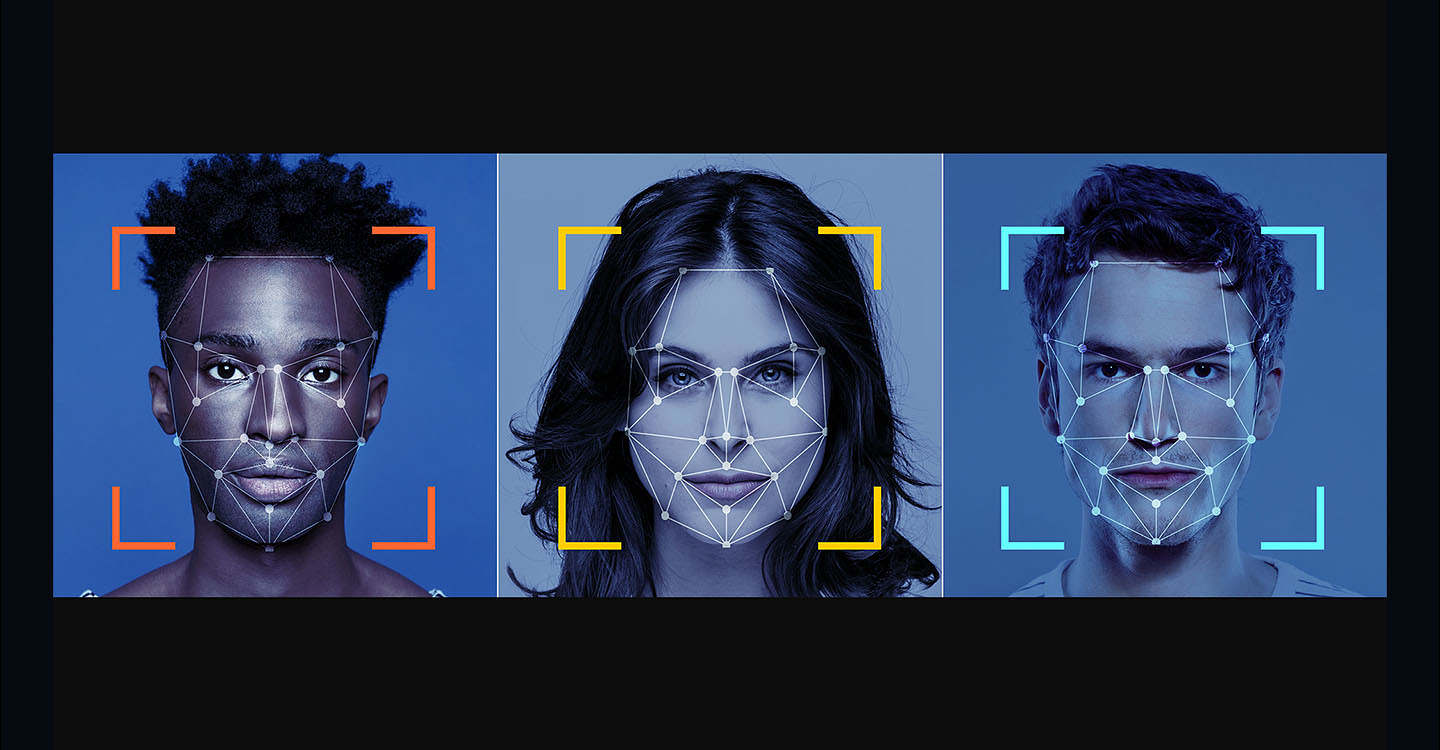

Conectando ao Google Drive para obter os arquivos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Passo 1: Importar as bibliotecas necessárias

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


Passo 2: Preparar os dados e iniciar o treinamento

Descompactar diretorio

In [ ]:
!unzip /content/drive/MyDrive/FACEMATCH/MLChallenge_Dataset.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: MLChallenge_Dataset/Data/6936/spoof/245257.jpg  
  inflating: MLChallenge_Dataset/Data/6936/spoof/484566.jpg  
   creating: MLChallenge_Dataset/Data/6946/
   creating: MLChallenge_Dataset/Data/6946/live/
  inflating: MLChallenge_Dataset/Data/6946/live/268809.jpg  
  inflating: MLChallenge_Dataset/Data/6946/live/336113.jpg  
   creating: MLChallenge_Dataset/Data/6946/spoof/
  inflating: MLChallenge_Dataset/Data/6946/spoof/103614.jpg  
  inflating: MLChallenge_Dataset/Data/6946/spoof/208423.jpg  
  inflating: MLChallenge_Dataset/Data/6946/spoof/374560.jpg  
   creating: MLChallenge_Dataset/Data/6951/
   creating: MLChallenge_Dataset/Data/6951/live/
   creating: MLChallenge_Dataset/Data/6951/spoof/
  inflating: MLChallenge_Dataset/Data/6951/spoof/271369.jpg  
  inflating: MLChallenge_Dataset/Data/6951/spoof/439942.jpg  
   creating: MLChallenge_Dataset/Data/6953/
   creating: MLChallenge_Dataset/Data/6953/live/
  infl

Copiar o dataset descompactado para o Google Drive

In [ ]:
# %cp -r /content/MLChallenge_Dataset /content/drive/MyDrive/FACEMATCH

Copia do dataset original

In [ ]:
# Criar uma cópia do dataset original
from distutils.dir_util import copy_tree
import os

# Defina o caminho do diretório original e o caminho do diretório de destino para a cópia
diretorio_original = '/content/MLChallenge_Dataset'
diretorio_destino = '/content/MLChallenge_Dataset_copia'

# Verifica se o diretório de destino já existe e, se não existir, cria-o
if not os.path.exists(diretorio_destino):
    os.makedirs(diretorio_destino)

# Copia o diretório original para o diretório de destino
copy_tree(diretorio_original, diretorio_destino)

['/content/MLChallenge_Dataset_copia/annotations.json',
 '/content/MLChallenge_Dataset_copia/README',
 '/content/MLChallenge_Dataset_copia/Data/9191/spoof/511301.png',
 '/content/MLChallenge_Dataset_copia/Data/9191/spoof/509964.png',
 '/content/MLChallenge_Dataset_copia/Data/9191/spoof/558346.png',
 '/content/MLChallenge_Dataset_copia/Data/8828/live/495255.png',
 '/content/MLChallenge_Dataset_copia/Data/697/spoof/365582.jpg',
 '/content/MLChallenge_Dataset_copia/Data/697/spoof/197847.jpg',
 '/content/MLChallenge_Dataset_copia/Data/697/spoof/229535.jpg',
 '/content/MLChallenge_Dataset_copia/Data/697/spoof/030484.jpg',
 '/content/MLChallenge_Dataset_copia/Data/697/spoof/291393.jpg',
 '/content/MLChallenge_Dataset_copia/Data/581/spoof/330962.jpg',
 '/content/MLChallenge_Dataset_copia/Data/581/spoof/442402.jpg',
 '/content/MLChallenge_Dataset_copia/Data/581/spoof/069631.jpg',
 '/content/MLChallenge_Dataset_copia/Data/6504/spoof/075417.jpg',
 '/content/MLChallenge_Dataset_copia/Data/6504/sp

Verificar se o dataset original e o copia tem a mesma dimensão

In [ ]:
import os

def contar_arquivos(diretorio):
    # Inicializa o contador de arquivos
    contador = 0

    # Percorre todos os arquivos e subdiretórios do diretório
    for _, _, arquivos in os.walk(diretorio):
        # Incrementa o contador com a quantidade de arquivos no diretório atual
        contador += len(arquivos)

    return contador

# Defina o caminho do diretório original e o caminho do diretório de destino da cópia
diretorio_original = '/content/MLChallenge_Dataset'
diretorio_copia = '/content/MLChallenge_Dataset_copia'

# Conta o número de arquivos nos diretórios original e de cópia
qtd_arquivos_original = contar_arquivos(diretorio_original)
qtd_arquivos_copia = contar_arquivos(diretorio_copia)

# Verifica se a quantidade de arquivos é a mesma
if qtd_arquivos_original == qtd_arquivos_copia:
    print("O diretório original e a cópia têm a mesma quantidade de arquivos.")
else:
    print("O diretório original e a cópia têm quantidades diferentes de arquivos.")


O diretório original e a cópia têm a mesma quantidade de arquivos.


Equilibrando o dataset

In [ ]:
import os
import shutil

# Diretórios
diretorio = "/content/MLChallenge_Dataset_copia"

# Diretórios de expurgo
dir_expurgo_live = "/content/expurgo_live"
dir_expurgo_spoof = "/content/expurgo_spoof"

# Cria os diretórios de expurgo se não existirem
if not os.path.exists(dir_expurgo_live):
    os.makedirs(dir_expurgo_live)

if not os.path.exists(dir_expurgo_spoof):
    os.makedirs(dir_expurgo_spoof)

# Função para equilibrar as imagens em uma pasta numerada
def equilibrar_pasta_numerada(pasta_numerada):
    live_dir = os.path.join(pasta_numerada, "live")
    spoof_dir = os.path.join(pasta_numerada, "spoof")

    # Conta as imagens nas pastas live e spoof
    num_live_images = len(os.listdir(live_dir))
    num_spoof_images = len(os.listdir(spoof_dir))

    if num_live_images == 0 or num_spoof_images == 0:
        # Exclui a pasta numerada se estiver vazia
        shutil.rmtree(pasta_numerada)
    else:
        if num_live_images > num_spoof_images:
            # Move as imagens excedentes de live para expurgo_live até que live == spoof
            for _ in range(num_live_images - num_spoof_images):
                live_images = os.listdir(live_dir)
                if len(live_images) > 0:
                    image_to_move = live_images[0]
                    src = os.path.join(live_dir, image_to_move)
                    dst = os.path.join(dir_expurgo_live, image_to_move)
                    shutil.move(src, dst)
        elif num_live_images < num_spoof_images:
            # Move as imagens excedentes de spoof para expurgo_spoof até que live == spoof
            for _ in range(num_spoof_images - num_live_images):
                spoof_images = os.listdir(spoof_dir)
                if len(spoof_images) > 0:
                    image_to_move = spoof_images[0]
                    src = os.path.join(spoof_dir, image_to_move)
                    dst = os.path.join(dir_expurgo_spoof, image_to_move)
                    shutil.move(src, dst)

# Loop para percorrer os diretórios numerados
for i in range(1, 11001):
    diretorio_numerado = os.path.join(diretorio, "Data", str(i))

    # Verifica se existem as pastas live e spoof
    live_dir = os.path.join(diretorio_numerado, "live")
    spoof_dir = os.path.join(diretorio_numerado, "spoof")

    if os.path.exists(live_dir) and os.path.exists(spoof_dir):
        equilibrar_pasta_numerada(diretorio_numerado)

# Verifica se as pastas estão equilibradas
total_live = sum(len(files) for _, _, files in os.walk(os.path.join(diretorio, "Data", "live")))
total_spoof = sum(len(files) for _, _, files in os.walk(os.path.join(diretorio, "Data", "spoof")))

print(f"Total de imagens 'live': {total_live}")
print(f"Total de imagens 'spoof': {total_spoof}")


Total de imagens 'live': 0
Total de imagens 'spoof': 0


Copiando images retiradas do dataset antes do treinamento, serão utilizadas para validação!

In [ ]:
%cp -r /content/expurgo_live /content/drive/MyDrive/FACEMATCH

In [ ]:
%cp -r /content/expurgo_spoof /content/drive/MyDrive/FACEMATCH

Verificando se o Dataset esta equilibrado

In [ ]:
import os
import glob

def contar_imagens(diretorio_base):
    # Inicializar contadores para imagens "live" e "spoof"
    total_live = 0
    total_spoof = 0

    # Percorrer todas as pastas numeradas de 1 a 11000
    for pasta_numerada in range(1, 11001):
        pasta_path = os.path.join(diretorio_base, "Data", str(pasta_numerada))

        # Contar imagens na pasta "live"
        pasta_live_path = os.path.join(pasta_path, "live")
        live_files = glob.glob(os.path.join(pasta_live_path, "*.jpg"))  # Modifique "*.jpg" para o formato das imagens se necessário
        total_live += len(live_files)

        # Contar imagens na pasta "spoof"
        pasta_spoof_path = os.path.join(pasta_path, "spoof")
        spoof_files = glob.glob(os.path.join(pasta_spoof_path, "*.jpg"))  # Modifique "*.jpg" para o formato das imagens se necessário
        total_spoof += len(spoof_files)

    return total_live, total_spoof

diretorio_base = "/content/MLChallenge_Dataset_copia"
total_live, total_spoof = contar_imagens(diretorio_base)

print("Total de imagens 'live':", total_live)
print("Total de imagens 'spoof':", total_spoof)


Total de imagens 'live': 6125
Total de imagens 'spoof': 5973


Separando o dataset em treino e teste

In [ ]:
import os
import re
import random
import shutil

def count_folders_with_numbers(starting_directory, lower_bound, upper_bound):
    count = 0
    matching_folders = []
    for folder_name in os.listdir(starting_directory):
        if re.match(r'^[1-9]\d{0,3}$|^10\d{3}$|^11\d{3}$', folder_name):
            count += 1
            matching_folders.append(folder_name)

    return count, matching_folders

def split_folders_for_training_test(folder_list, train_ratio=0.8):
    random.shuffle(folder_list)
    split_index = int(len(folder_list) * train_ratio)
    train_folders = folder_list[:split_index]
    test_folders = folder_list[split_index:]
    return train_folders, test_folders

# Example usage:
diretorio_inicial = '/content/MLChallenge_Dataset_copia/Data'
total_folders, matching_folders = count_folders_with_numbers(diretorio_inicial, 1, 11000)
print(f"Total number of folders found: {total_folders}")

# Separating folders for training and testing
train_folders, test_folders = split_folders_for_training_test(matching_folders)

# Printing results
print(f"Number of folders for training: {len(train_folders)}")
print(f"Number of folders for testing: {len(test_folders)}")

# Move folders to separate directories for training and testing (optional)
train_dir = '/content/train_data'
test_dir = '/content/test_data'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for folder_name in train_folders:
    shutil.move(os.path.join(diretorio_inicial, folder_name), os.path.join(train_dir, folder_name))

for folder_name in test_folders:
    shutil.move(os.path.join(diretorio_inicial, folder_name), os.path.join(test_dir, folder_name))


Total number of folders found: 4948
Number of folders for training: 3958
Number of folders for testing: 990


Copiando pasta de treino e teste

In [ ]:
# %cp -r /content/test_data /content/drive/MyDrive/FACEMATCH/dataset

In [ ]:
# %cp -r /content/train_data /content/drive/MyDrive/FACEMATCH/dataset

Passo 3: Treinar a rede neural | Avaliar o desempenho da rede

In [ ]:
!pip install tensorflow

Separando as imagens em live e spoof


In [ ]:
import os
import shutil

def find_and_separate_files(source_dir, destination_dir, target_categories):
    for root, _, files in os.walk(source_dir):
        for category in target_categories:
            if category in root:
                category_dir = os.path.join(destination_dir, f"new_Train_data_{category}")
                os.makedirs(category_dir, exist_ok=True)

                for file in files:
                    source_file_path = os.path.join(root, file)
                    destination_file_path = os.path.join(category_dir, file)
                    shutil.move(source_file_path, destination_file_path)

if __name__ == "__main__":
    source_directory = "/content/train_data"
    destination_directory = "/content"

    # Replace "live" and "spoof" with the actual folder names you have in the train_data directory.
    target_categories_to_separate = ["live", "spoof"]

    find_and_separate_files(source_directory, destination_directory, target_categories_to_separate)


Treinamento da Rede Neural

Esta rede neural é um modelo de classificação binária construído usando a biblioteca TensorFlow e a API Keras. Ele é projetado para classificar imagens em duas classes: "live" e "spoof". O objetivo provável é classificar se uma imagem é uma imagem real ("live") ou uma imagem falsificada ("spoof").


A arquitetura da rede neural é a seguinte:


-  Camada de entrada: Essa camada recebe as imagens de entrada com dimensões (img_width, img_height, 3), onde img_width e img_height são definidos como 128 pixels. O número 3 refere-se aos três canais de cores RGB das imagens.


-  Camadas de convolução e max pooling: A rede contém três camadas de convolução, cada uma seguida por uma camada de max pooling. Cada camada de convolução tem filtros de tamanho 3x3 e as funções de ativação usadas são a função "ReLU" (Rectified Linear Unit), que é comumente usada em redes neurais para adicionar não-linearidade.


-  Camada Flatten: Após as camadas de convolução e max pooling, os dados são achatados em um vetor unidimensional usando a camada Flatten. Isso prepara os dados para serem passados por camadas densas (totalmente conectadas).


-  Camada densa: A rede possui uma camada densa (totalmente conectada) com 128 unidades e uma função de ativação "ReLU". Isso permite que a rede aprenda características complexas dos dados.


-  Camada Dropout: Para evitar o overfitting, é aplicada uma camada de Dropout com uma taxa de 0,5. O Dropout desativa aleatoriamente alguns neurônios durante o treinamento para tornar a rede mais robusta.


-  Camada de saída: A última camada é uma camada densa com uma unidade de saída e a função de ativação "sigmoid". A função de ativação "sigmoid" é usada para converter a saída em um valor entre 0 e 1, que representa a probabilidade da imagem pertencer à classe "live" (0) ou "spoof" (1).


-  O modelo é compilado usando o otimizador "adam" e a função de perda "binary_crossentropy", que é apropriada para problemas de classificação binária. A métrica de avaliação é a "accuracy" (acurácia), que mede a precisão da classificação.


-  Durante o treinamento, são utilizados geradores de dados para pré-processamento e aumento dos dados de treinamento. O aumento de dados é realizado aplicando transformações aleatórias nas imagens para aumentar a diversidade do conjunto de treinamento.


-  O modelo é treinado em duas etapas: primeiro usando dados "live" e depois usando dados "spoof". Após o treinamento, o modelo é salvo em um arquivo "trained_model4.h5" no diretório "saved_model".


Cabe mencionar que o código de treinamento poderia ser aprimorado adicionando etapas de validação para monitorar o desempenho do modelo durante o treinamento e ajustar hiperparâmetros para obter melhores resultados. Além disso, os dados "live" e "spoof" devem estar bem equilibrados para garantir uma aprendizagem adequada da rede neural.

Primeira versão


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Diretórios das imagens de treino
train_data_root_live = '/content/new_Train_data_live'
train_data_root_spoof = '/content/new_Train_data_spoof'

# Verificar o conteúdo dos diretórios
print("Conteúdo do diretório 'new_Train_data_live':")
print(os.listdir(train_data_root_live))

print("\nConteúdo do diretório 'new_Train_data_spoof':")
print(os.listdir(train_data_root_spoof))

# Dimensões das imagens para redimensionamento
img_width, img_height = 128, 128

# Parâmetros do treinamento
batch_size = 32
epochs = 10

# Pré-processamento e aumento de dados para imagens reais (live)
train_datagen_live = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Carregamento das imagens de treino reais (live)
train_generator_live = train_datagen_live.flow_from_directory(
    train_data_root_live,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Pré-processamento e aumento de dados para imagens falsas (spoof)
train_datagen_spoof = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Carregamento das imagens de treino falsas (spoof)
train_generator_spoof = train_datagen_spoof.flow_from_directory(
    train_data_root_spoof,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Criação do modelo
def create_model():
    input_layer = tf.keras.Input(shape=(img_width, img_height, 3))
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Criar o modelo
model = create_model()

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Sumário do modelo
model.summary()

# Treinar o modelo usando dados reais (live)
if len(train_generator_live) > 0:
    model.fit_generator(train_generator_live, steps_per_epoch=len(train_generator_live), epochs=epochs)
else:
    print("Não há imagens suficientes de live para treinar o modelo.")

# Treinar o modelo usando dados falsos (spoof)
if len(train_generator_spoof) > 0:
    model.fit_generator(train_generator_spoof, steps_per_epoch=len(train_generator_spoof), epochs=epochs)
else:
    print("Não há imagens suficientes de spoof para treinar o modelo.")

# Salvar o modelo após o treinamento
save_path = '/content/saved_model/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

model.save(os.path.join(save_path, 'trained_model4.h5'))
print("Modelo salvo com sucesso!")


Conteúdo do diretório 'new_Train_data_live':
['008186.jpg', '096105.jpg', '182647.jpg', '556745.png', '187765.jpg', '313412.jpg', '286795.jpg', '125444.jpg', '369724.jpg', '533158.png', '428515.jpg', '434062.jpg', '396063.jpg', '081818.jpg', '388749.jpg', '104831.jpg', '193995.jpg', '539748.png', '369497.jpg', '224686.jpg', '100435.jpg', '241194.jpg', '166690.jpg', '069591.jpg', '109472.jpg', '076704.jpg', '153667.jpg', '448097.jpg', '305761.jpg', '007619.jpg', '497113.png', '435650.jpg', '132058.jpg', '397230.jpg', '549739.png', '218789.jpg', '342343.jpg', '192334.jpg', '050239.jpg', '195962.jpg', '001498.jpg', '377851.jpg', '480822.jpg', '377213.jpg', '463800.jpg', '085899.jpg', '293704.jpg', '549786.png', '485449.jpg', '027094.jpg', '179297.jpg', '249342.jpg', '222925.jpg', '315092.jpg', '331897.jpg', '137288.jpg', '496887.png', '546929.png', '407742.jpg', '019869.jpg', '413221.jpg', '235298.jpg', '239154.jpg', '167407.jpg', '032414.jpg', '370294.jpg', '022287.jpg', '508900.png', '4

Segunda versão

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Diretórios das imagens de treino
train_data_root_live = '/content/new_Train_data_live'
train_data_root_spoof = '/content/new_Train_data_spoof'

# Verificar o conteúdo dos diretórios
print("Conteúdo do diretório 'new_Train_data_live':")
print(os.listdir(train_data_root_live))

print("\nConteúdo do diretório 'new_Train_data_spoof':")
print(os.listdir(train_data_root_spoof))

# Dimensões das imagens para redimensionamento
img_width, img_height = 128, 128

# Parâmetros do treinamento
batch_size = 32
epochs = 10

# Pré-processamento e aumento de dados para imagens reais (live)
train_datagen_live = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Carregamento das imagens de treino reais (live)
train_generator_live = train_datagen_live.flow_from_directory(
    train_data_root_live,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Pré-processamento e aumento de dados para imagens falsas (spoof)
train_datagen_spoof = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Carregamento das imagens de treino falsas (spoof)
train_generator_spoof = train_datagen_spoof.flow_from_directory(
    train_data_root_spoof,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Criação do modelo
def create_model():
    input_layer = tf.keras.Input(shape=(img_width, img_height, 3))
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu')(x)  # Nova camada convolucional
    x = MaxPooling2D((2, 2))(x)                  # Nova camada de pooling
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)          # Aumentar o número de neurônios
    x = Dropout(0.5)(x)                          # Ajustar a taxa de dropout
    x = Dense(256, activation='relu')(x)          # Nova camada densa
    x = Dropout(0.5)(x)                          # Ajustar a taxa de dropout
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Criar o modelo
model = create_model()

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Sumário do modelo
model.summary()

# Treinar o modelo usando dados reais (live)
if len(train_generator_live) > 0:
    model.fit_generator(train_generator_live, steps_per_epoch=len(train_generator_live), epochs=epochs)
else:
    print("Não há imagens suficientes de live para treinar o modelo.")

# Treinar o modelo usando dados falsos (spoof)
if len(train_generator_spoof) > 0:
    model.fit_generator(train_generator_spoof, steps_per_epoch=len(train_generator_spoof), epochs=epochs)
else:
    print("Não há imagens suficientes de spoof para treinar o modelo.")

# Salvar o modelo após o treinamento
save_path = '/content/saved_model/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

model.save(os.path.join(save_path, 'trained_model5.h5'))
print("Modelo salvo com sucesso!")


Conteúdo do diretório 'new_Train_data_live':
['008186.jpg', '096105.jpg', '182647.jpg', '556745.png', '187765.jpg', '313412.jpg', '286795.jpg', '125444.jpg', '369724.jpg', '533158.png', '428515.jpg', '434062.jpg', '396063.jpg', '081818.jpg', '388749.jpg', '104831.jpg', '193995.jpg', '539748.png', '369497.jpg', '224686.jpg', '100435.jpg', '241194.jpg', '166690.jpg', '069591.jpg', '109472.jpg', '076704.jpg', '153667.jpg', '448097.jpg', '305761.jpg', '007619.jpg', '497113.png', '435650.jpg', '132058.jpg', '397230.jpg', '549739.png', '218789.jpg', '342343.jpg', '192334.jpg', '050239.jpg', '195962.jpg', '001498.jpg', '377851.jpg', '480822.jpg', '377213.jpg', '463800.jpg', '085899.jpg', '293704.jpg', '549786.png', '485449.jpg', '027094.jpg', '179297.jpg', '249342.jpg', '222925.jpg', '315092.jpg', '331897.jpg', '137288.jpg', '496887.png', '546929.png', '407742.jpg', '019869.jpg', '413221.jpg', '235298.jpg', '239154.jpg', '167407.jpg', '032414.jpg', '370294.jpg', '022287.jpg', '508900.png', '4

Copiando/ Salvando pesos do modelo

In [ ]:
%cp -r /content/saved_model/trained_model6.h5 /content/drive/MyDrive/FACEMATCH/weights

Passo 6: Teste

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Caminho para o arquivo .h5 do modelo
model_path = '/content/saved_model/trained_model4.h5'

# Carregar o modelo
model = load_model(model_path)

# Resumo do modelo (opcional, mostra a arquitetura do modelo)
model.summary()

# Exemplo de como fazer previsões com o modelo
# Neste exemplo, você precisa ter uma imagem de teste (ou mais) para fazer a previsão
# Substitua 'caminho/para/a/imagem.jpg' pelo caminho da imagem de teste que você quer usar
image_path = '/content/expurgo_spoof/000090.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = image_array / 255.0  # Normalização dos valores dos pixels (se necessário)
image_array = tf.expand_dims(image_array, 0)  # Adicionando uma dimensão extra para representar o batch

# Fazendo a previsão com o modelo carregado
predictions = model.predict(image_array)

# Obtendo o resultado da previsão (0 ou 1 no caso de classificação binária)
predicted_class = int(predictions[0][0] + 0.5)

# Imprimindo o resultado da previsão
if predicted_class == 0:
    print("A imagem é classificada como 'real'.")
else:
    print("A imagem é classificada como 'fake'.")


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 128)       7385

Teste - imagens da pasta LIVE

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

# Caminho para o arquivo .h5 do modelo
model_path = '/content/saved_model/trained_model4.h5'

# Carregar o modelo
model = load_model(model_path)

# Função para fazer previsões com o modelo e contar os resultados
def predict_and_count(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = image_array / 255.0  # Normalização dos valores dos pixels (se necessário)
    image_array = tf.expand_dims(image_array, 0)  # Adicionando uma dimensão extra para representar o batch

    # Fazendo a previsão com o modelo carregado
    predictions = model.predict(image_array)

    # Obtendo o resultado da previsão (0 ou 1 no caso de classificação binária)
    predicted_class = int(predictions[0][0] + 0.5)

    return predicted_class

# Inicializando contadores
certas_live = 0
falsas_live = 0

# Loop para percorrer os arquivos na pasta
folder_path = '/content/expurgo_live'
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        image_path = os.path.join(folder_path, filename)
        predicted_class = predict_and_count(image_path)

        # Atualizando contadores
        if predicted_class == 0:
            certas_live += 1
        else:
            falsas_live += 1

# Imprimindo os resultados
print("ACERTOU':", certas_live)
print("ERROU:", falsas_live)


1/1 [==============================] - 0s 22ms/step
ACERTOU': 1192
ERROU: 78


Teste - imagens da pasta SPOOF

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

# Caminho para o arquivo .h5 do modelo
model_path = '/content/saved_model/trained_model4.h5'

# Carregar o modelo
model = load_model(model_path)

# Função para fazer previsões com o modelo e contar os resultados
def predict_and_count(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = image_array / 255.0  # Normalização dos valores dos pixels (se necessário)
    image_array = tf.expand_dims(image_array, 0)  # Adicionando uma dimensão extra para representar o batch

    # Fazendo a previsão com o modelo carregado
    predictions = model.predict(image_array)

    # Obtendo o resultado da previsão (0 ou 1 no caso de classificação binária)
    predicted_class = int(predictions[0][0] + 0.5)

    return predicted_class

# Inicializando contadores
falsas_spoof = 0
certas_spoof = 0

# Loop para percorrer os arquivos na pasta
folder_path = '/content/expurgo_spoof'
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        image_path = os.path.join(folder_path, filename)
        predicted_class = predict_and_count(image_path)

        # Atualizando contadores
        if predicted_class == 0:
            falsas_spoof += 1
        else:
            certas_spoof += 1

# Imprimindo os resultados
print("ACERTOU':", falsas_spoof)
print("ERROU:", certas_spoof)


1/1 [==============================] - 0s 28ms/step
ACERTOU': 4156
ERROU: 308


Avaliando a performance do modelo

In [ ]:
def calcular_percentual_assertividade(real_count_live, fake_count_live, real_count_spoof, fake_count_spoof):
    total_real = real_count_live + real_count_spoof
    total_fake = fake_count_live + fake_count_spoof
    total_amostras = total_real + total_fake

    percentual_assertividade = (total_real / total_amostras) * 100

    return percentual_assertividade

# Exemplo de uso:
real_count_live = certas_live
fake_count_live = falsas_live
real_count_spoof = falsas_spoof
fake_count_spoof = certas_spoof

percentual_assertividade = calcular_percentual_assertividade(real_count_live, fake_count_live, real_count_spoof, fake_count_spoof)
print(f'O percentual de assertividade é: {percentual_assertividade:.2f}%')

O percentual de assertividade é: 93.27%


Conclusão

In [ ]:
"""O código fornecido é um exemplo de um modelo de classificação binária usando imagens como entrada. No entanto, não está claro qual é exatamente o problema que você está enfrentando ou o que quer dizer com "esse modelo está identificando qualquer imagem como fake".

Vou explicar o código para melhor compreensão:

Carregamento e pré-processamento dos dados de treino:
O código usa a biblioteca Keras com o TensorFlow backend para carregar e pré-processar os dados de treinamento. O ImageDataGenerator é usado para aplicar transformações nas imagens, como normalização, rotação, deslocamento horizontal/vertical e outros aumentos de dados. Ele carrega as imagens do diretório raiz de treinamento (train_data_root) e divide as imagens em lotes para o treinamento (batch_size).

Criação do modelo:
O modelo é criado usando uma sequência de camadas convolucionais e de pooling, seguida por camadas densas. O modelo tem a seguinte estrutura:

Camada de entrada: Aceita imagens com dimensões (img_width, img_height, 3) (3 canais de cor RGB).
Três camadas convolucionais com ativação ReLU e três camadas MaxPooling para redução de dimensões.
Camada Flatten para transformar a saída das camadas convolucionais em um vetor 1D.
Uma camada densa com ativação ReLU.
Uma camada Dropout para regularização.
Camada de saída com ativação sigmóide, que é a função de ativação usada em problemas de classificação binária.
Compilação e treinamento do modelo:
O modelo é compilado com o otimizador "adam" e a função de perda "binary_crossentropy" para problemas de classificação binária. Em seguida, ele é treinado usando os dados gerados pelo train_generator durante o número de épocas especificado (epochs).

Salvando o modelo treinado:
O modelo é salvo em formato .h5 após o treinamento.

Se o modelo está classificando todas as imagens como falsas, pode haver algumas razões possíveis:

O conjunto de dados de treinamento pode estar desequilibrado, ou seja, pode haver uma quantidade significativamente maior de exemplos de uma classe do que da outra. Isso pode fazer com que o modelo favoreça a classe majoritária e tenha dificuldade em aprender a classe minoritária.
O modelo pode ser muito simples ou muito complexo para o problema em questão, o que pode levar a um ajuste inadequado (overfitting) ou subajuste (underfitting).
Os parâmetros de treinamento, como taxa de aprendizado, tamanho do lote e número de épocas, podem precisar ser ajustados para obter melhores resultados.
Para obter uma análise mais aprofundada e identificar possíveis problemas com o modelo, é importante verificar o conjunto de dados de treinamento, sua distribuição e como o modelo está se comportando durante o treinamento. Também pode ser útil tentar diferentes arquiteturas de modelo e ajustar os parâmetros de treinamento para obter melhores resultados. Além disso, verificar os dados de validação e teste pode ajudar a avaliar o desempenho geral do modelo."""

'O código fornecido é um exemplo de um modelo de classificação binária usando imagens como entrada. No entanto, não está claro qual é exatamente o problema que você está enfrentando ou o que quer dizer com "esse modelo está identificando qualquer imagem como fake".\n\nVou explicar o código para melhor compreensão:\n\nCarregamento e pré-processamento dos dados de treino:\nO código usa a biblioteca Keras com o TensorFlow backend para carregar e pré-processar os dados de treinamento. O ImageDataGenerator é usado para aplicar transformações nas imagens, como normalização, rotação, deslocamento horizontal/vertical e outros aumentos de dados. Ele carrega as imagens do diretório raiz de treinamento (train_data_root) e divide as imagens em lotes para o treinamento (batch_size).\n\nCriação do modelo:\nO modelo é criado usando uma sequência de camadas convolucionais e de pooling, seguida por camadas densas. O modelo tem a seguinte estrutura:\n\nCamada de entrada: Aceita imagens com dimensões (im